## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from textblob import TextBlob, Word
from nltk.corpus import stopwords

## Data Ingestion

In [2]:
#Reading in data
data = pd.read_csv('/content/drive/MyDrive/BeerDataScienceProject.csv', encoding = 'latin-1')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


In [3]:
#Viewing any explanatory variables containing null values
data.isnull().sum()

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
dtype: int64

In [4]:
#Viewing the first 5 entries of data
data.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [5]:
#Viewing the last 5 entries of data
data.tail()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
528865,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.0,4.0,3.5,orangemoustache,4.0,"A-pours a reddish amber that looks very nice,l...",1205212721
528866,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.5,3.0,3.0,MisterStout,3.0,I don't really have anything special to say ab...,1203490783
528867,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,4.0,4.5,4.0,meechum,4.5,Had this on tap at Vreny's Beirgarten A - Came...,1201320897
528868,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.0,4.0,4.0,Dodo2step,4.5,"Purchased at Market Cross Pub in carlisle, PA....",1201215290
528869,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,4.0,4.0,4.0,jenbys2001,4.0,"I ordered a mug of this beer at Schnitzelhaus,...",1200336367


In [6]:
#Dropping null values for review_text and beer ABV as these values are needed for evaluation.
#Dropping these value is a very small percentage of the data: ~3.8%
data.dropna(axis = 0, subset = ['beer_ABV', 'review_text' ], inplace = True)

In [7]:
#Changing dtype of review time from timestamp to datatime
from datetime import datetime as dt

data['review_time'] = data['review_time'].apply(lambda x: dt.fromtimestamp(x))
data.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,2009-02-16 20:57:03
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",2009-03-01 13:44:57
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",2009-03-01 14:10:04
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",2009-02-15 19:12:25
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",2010-12-30 18:53:26


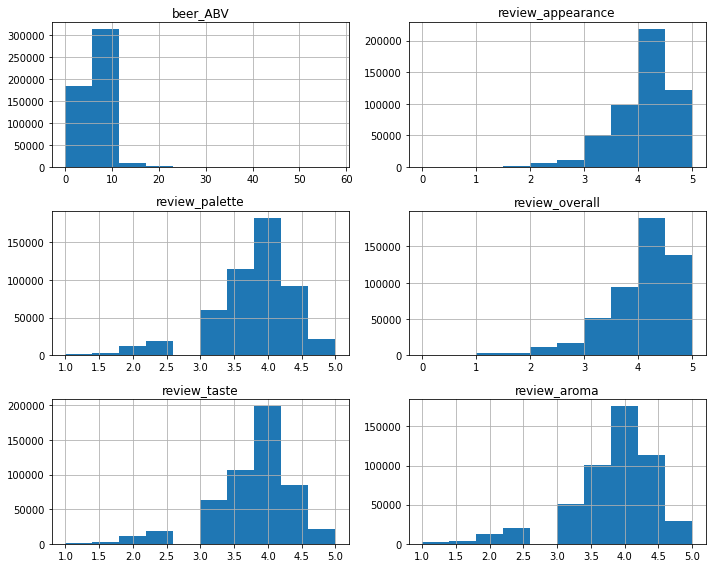

In [8]:
#Viewing the distribution of numerical explanatory variables via histograms
data.hist(figsize = (10,8), bins = 10, column=['beer_ABV', 'review_appearance', 'review_palette', 
                                    'review_overall', 'review_taste', 'review_aroma'])
plt.tight_layout();

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:584: UserWarning: The handle <BarContainer object of 15 artists> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


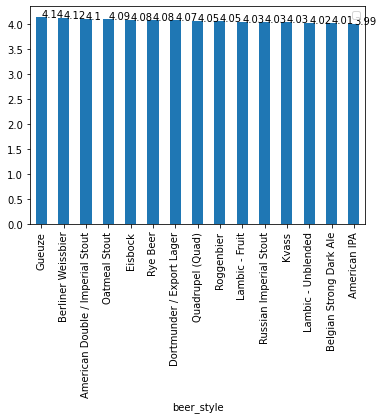

In [9]:
#Viewing the top 15 most popular types of beer
beer_type = data.groupby('beer_style')['review_overall'].mean().reset_index().sort_values(by = 'review_overall', ascending = False)

beer_type[:15].plot(x = 'beer_style', y = 'review_overall', kind = 'bar', label = '_nolegend_')

def labels(y):
    for i in range(len(beer_type[:15])):
        plt.text(i,y.iloc[i],y.iloc[i])

labels(round(beer_type['review_overall'], 2));

### Question 1: Rank top 3 breweries producing strongest beer.

In [10]:
#Obtaining the ranking for strongest beer using groupby
ranked_abv = data.groupby(['beer_brewerId', 'beer_name', 'beer_style'])['beer_ABV'].max().reset_index()
ranked_abv = ranked_abv.sort_values(by = ['beer_ABV'], ascending = False)
ranked_abv.drop_duplicates(subset = ['beer_brewerId'], keep = 'first')[:5]

,beer_brewerId,beer_name,beer_style,beer_ABV
9218,6513,Schorschbräu Schorschbock 57%,Eisbock,57.7
325,35,Samuel Adams Utopias,American Strong Ale,27.0
12434,16866,Grey Monday,American Double / Imperial Stout,19.5
7049,2958,Cuvée Alex Le Rouge Eisbock,Eisbock,19.5
13118,18796,Acero,American Strong Ale,19.2


Answer: The top 3 breweries that produce the strongest beers are listed below staring with the brewer ID with the highest ABV percentage:


1.   Brewer ID 6513
2.   Brewer ID 35

1.   Brewer IDs 16866, 2958

Ranked 3 was tied amongst 2 different brewer IDs at 19.5% ABV.






### Question 2: Which year did beer enjoy the highest rating?

In [11]:
#Extract year fro review time
data['Year'] = data['review_time'].apply(lambda x: x.year)

In [12]:
#Obtaining the Year with the highest average rating score
ratings_by_yr = data.groupby('Year')['review_overall'].mean().reset_index()
ratings_by_yr

,Year,review_overall
0,1998,4.045455
1,1999,4.000000
2,2000,4.233333
3,2001,3.961896
4,2002,3.817551
5,2003,3.772807
6,2004,3.806792
7,2005,3.844327
8,2006,3.808826
9,2007,3.819898


Answer: 1988 enjoyed the highest average rating score.

In [13]:
#Obtaining the year with the highest number of reviews
rate_by_yr = data.groupby('Year')['review_overall'].count().reset_index()
rate_by_yr.sort_values(by = ['review_overall'], ascending = False)

,Year,review_overall
13,2011,107871
12,2010,91342
11,2009,81236
10,2008,66594
9,2007,44486
8,2006,40730
7,2005,27818
6,2004,21306
5,2003,16585
4,2002,6843


Answer: 2011 enjoyed the highest number of reviews.

### Question 3: Based on user's ratings, which factors are  more important?

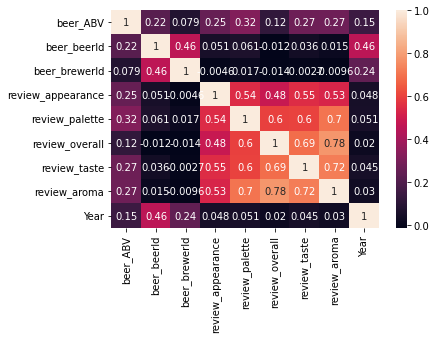

In [14]:
#Viewing correlation matrix for numerical explanatory variables
import seaborn as sns

sns.heatmap(data.corr(), annot = True);

Answer: Base on this correlation matrix, review aroma is the most important factor to the overall rating since it has the highest Pearson correlation coefficient of 0.78 to overall rating score. Taste would be the second most important with a Pearson correlation coefficient of 0.72.

### Question 4: Which 3 beers to recommend based on this data?

In [15]:
#Obtaining ranked beers based on overall rating score, taste, and aroma. 
beer_rec = data.groupby(['beer_name', 'beer_style']).agg({'review_overall': 'mean', 
                                                          'review_taste': 'mean', 
                                                          'review_aroma': 'mean', 
                                                          'review_appearance': 'count'}).reset_index()
beer_rec.rename(columns = {'review_appearance': 'review_count'}, inplace = True)
beer_rec = beer_rec.sort_values(by = ['review_overall', 'review_taste', 'review_aroma'], ascending = False)
beer_rec


,beer_name,beer_style,review_overall,review_taste,review_aroma,review_count
42,10th Anniversary Strong Belgian,Belgian Strong Dark Ale,5.0,5.0,5.0,1
1589,Bigwood Oak Aged Stout,American Double / Imperial Stout,5.0,5.0,5.0,1
2183,Bourbon Barrel Coffee Night Train,American Porter,5.0,5.0,5.0,1
2864,Celtic Red,Irish Red Ale,5.0,5.0,5.0,1
3109,Christmas Stark Lager,Märzen / Oktoberfest,5.0,5.0,5.0,1
...,...,...,...,...,...,...
12307,Sunshine Coast Noosa Premium Ale,American Adjunct Lager,1.0,1.0,1.0,1
12374,Swan MID,Light Lager,1.0,1.0,1.0,1
12494,Tango,Fruit / Vegetable Beer,1.0,1.0,1.0,1
14180,Zhigulevskoye Lubitelskoye,American Adjunct Lager,1.0,1.0,1.0,1


In [16]:
#Removing beers that have review counts below the median
beer_rec = beer_rec[beer_rec['review_count'] >= beer_rec['review_count'].mean()]
beer_rec[:10]

,beer_name,beer_style,review_overall,review_taste,review_aroma,review_count
11775,Southampton Berliner Weisse,Berliner Weissbier,4.768293,4.390244,4.560976,41
3129,Citra DIPA,American Double / Imperial IPA,4.630952,4.373016,4.573413,252
2682,Cantillon Blåbær Lambik,Lambic - Fruit,4.628205,4.493590,4.628205,156
5751,Heady Topper,American Double / Imperial IPA,4.625800,4.405117,4.608742,469
4700,Founders CBS Imperial Stout,American Double / Imperial Stout,4.591052,4.579278,4.697017,637
3456,Cuir (100% Bourbon Barrel Aged),Old Ale,4.529412,4.294118,4.549020,51
8064,Masala Mama India Pale Ale,American IPA,4.488671,4.332326,4.397281,662
6353,Humulus Lager,American Double / Imperial Pilsner,4.479452,4.239726,4.493151,73
200,5th Anniversary Ale,American Double / Imperial IPA,4.475610,4.219512,4.500000,41
11875,Splinter Gold,American Wild Ale,4.460784,4.431373,4.470588,51


The 3 beers that I would recommend (in no particular order) would be: Southampton Berliner Weisse, Citra DIPA, and Cantillon Blåbær Lambik.

These beers are chosen because the average scores for overall rating, taste, and aroma are high. Additionally, the beers selected had a review count higher than average total review counts. 

### Question 5: Which beer styles seem to be a favorite based on written reviews?

In [17]:
#Tokenizing words
import nltk
from textblob import TextBlob, Word
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

data ['review_text'] = data['review_text'].astype('str')

#Adding tokenized text as an attribute
data['tokenized_text'] = data['review_text'].apply(lambda x: nltk.word_tokenize(x.lower()))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
#List of stopwords
stop_words = list(stopwords.words('english'))
print (stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
#Removing stopwords and adding new lists as attribute
from nltk.stem import WordNetLemmatizer, PorterStemmer

data['stopwords_removal'] = data['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])

In [20]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer, PorterStemmer

#Lemmatizing and Stemming lists of words and adding new lists as attribute
data['lem_stem'] = data['stopwords_removal'].apply(lambda x: [Word(w).lemmatize() for w in x])
data['lem_stem'] = data['lem_stem'].apply(lambda x: [PorterStemmer().stem(w) for w in x])
data['lem_stem'] = data['lem_stem'].apply(lambda x: " ".join(x))

#Adding polarity of tweets as new attributes
data['polarity'] = data['lem_stem'].apply(lambda x: TextBlob(x).sentiment.polarity)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
data[['review_overall', 'polarity']][:25]

,review_overall,polarity
0,1.5,0.134091
1,3.0,-0.004545
2,3.0,0.066667
3,3.0,0.312222
4,4.0,0.156349
5,3.0,0.213492
6,3.5,0.366667
7,3.0,0.298444
8,4.0,0.306667
9,4.5,0.122193


In [34]:
#Ranking beer style by polarity score
beer_style = data.groupby('beer_style')['polarity'].mean().reset_index()
beer_style.sort_values(by = 'polarity', ascending = False, inplace = True)
beer_style

,beer_style,polarity
99,Vienna Lager,0.252282
38,Dortmunder / Export Lager,0.251540
82,Märzen / Oktoberfest,0.229882
65,Hefeweizen,0.225795
85,Pumpkin Ale,0.225121
...,...,...
75,Lambic - Unblended,0.138101
50,English Stout,0.136609
13,American Malt Liquor,0.134966
64,Happoshu,0.128067


Answer: The favorite beer style based on written reviews is Vienna Lager with an average polarity score of 0.252.

### Question 6: How does written reviews compare to overall rating scores?

In [25]:
data.reset_index(drop = True, inplace = True)

In [32]:
#Adding terms for rating scores and polarity scores
review = []

for i in range(len(data)):
  if data['review_overall'].iloc[i] == 3:
    review.append('neutral')
  elif data['review_overall'].iloc[i] < 3:
    review.append('bad')
  else:
    review.append('good')

polarity = []

for i in range(len(data)):
  if data['polarity'].iloc[i] < -0.1:
    polarity.append('bad')
  elif data['polarity'].iloc[i] > 0.1:
    polarity.append('good')
  else:
    polarity.append('neutral')

data['reivew_rank'] = review
data['polarity_rank'] = polarity

In [38]:
#Calculating the percentage of unmatched scores
unmatched_ranks = len(data[data['reivew_rank'] != data['polarity_rank']])
percent_unmatched = (unmatched_ranks/len(data))*100
print("The percentage of unmatched polarity scores to rating scores is:", percent_unmatched, '%')

The percentage of unmatched polarity scores to rating scores is: 29.21177722317606 %


Answer: About 29% of the polarity results do not align or reflect the overall rating scores. Therefore, 71% of the written reviews reflected the overall rating scores.

Polarity scores were grouped into "bad" (scores < -0.1), "good" (scores > 0.1), and "neutral". 

Overall rating scores were grouped in "bad" (scores < 3), "good" (scores > 3), and "neutral" (scores = 3).

These groupings for rating scores and polarity score were compared to see if they match. 